In [1]:
import matplotlib.pyplot as plt
import pydicom
import numpy as np
import seaborn as sns
import os

# Load all CT scans of one patient

MORE INFORMATION on importing .dcm files: https://www.kaggle.com/srikanthpotukuchi/understanding-dcm-files-using-pydicom

Data from https://www.kaggle.com/c/osic-pulmonary-fibrosis-progression/notebooks

This script uses ID00007637202177411956430 as an example

In [2]:
# check how many CT scans are in the folder
patient_id_str = './'+'ID00007637202177411956430'
if os.path.exists(patient_id_str + '.DS_Store'):
    os.remove(patient_id_str+'.DS_Store') # this MAC OS system file always messes things up
num_scans = len(os.listdir(patient_id_str))
print(num_scans)

30


In [3]:
# import all scans into a list called arr_scans, a 3d array
arr_scans = []

for a_scan in range(num_scans):
    ds = pydicom.dcmread(patient_id_str + '/' + str(a_scan+1) + '.dcm')
    arr_scans.append(ds.pixel_array)

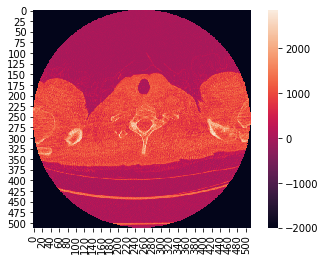

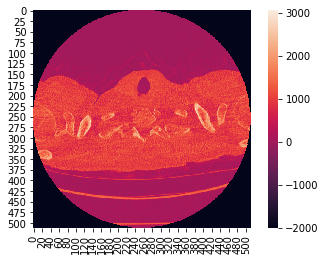

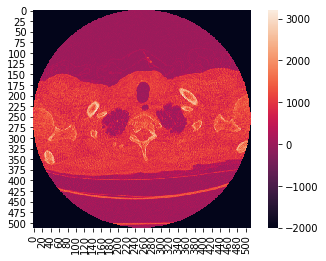

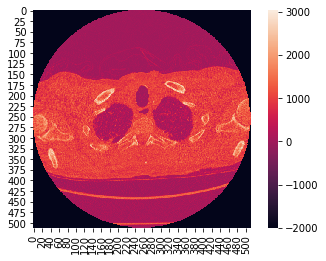

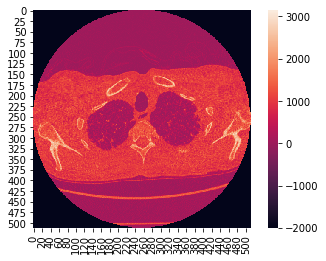

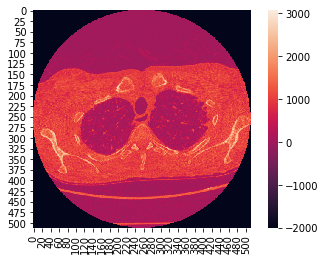

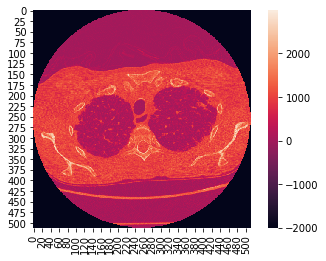

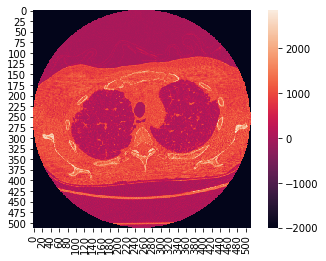

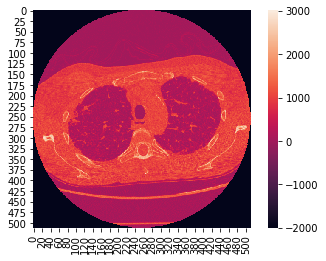

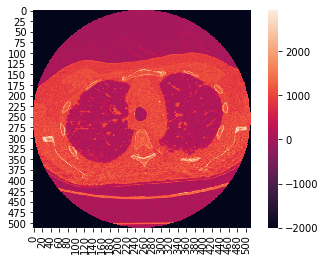

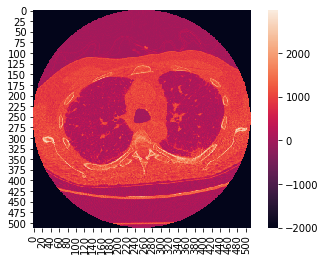

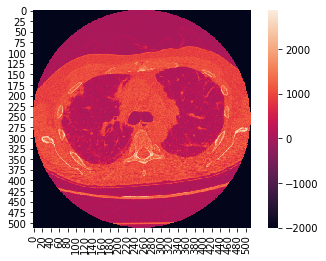

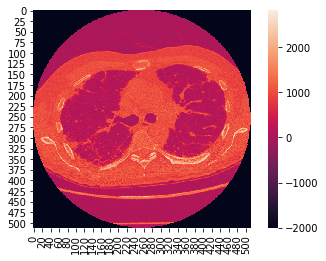

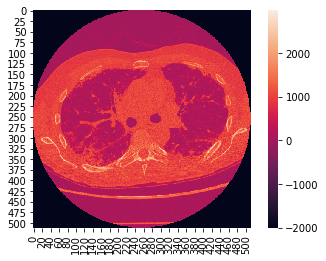

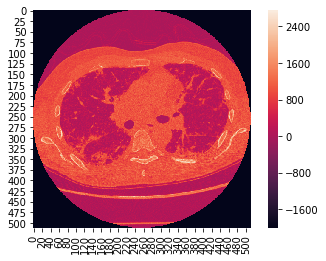

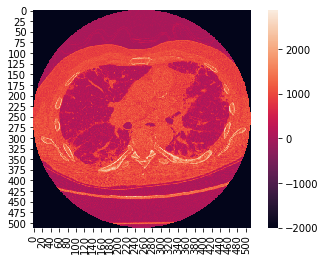

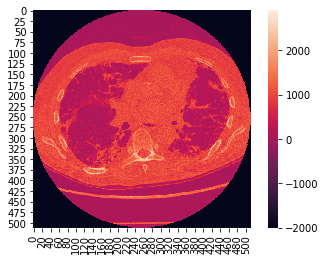

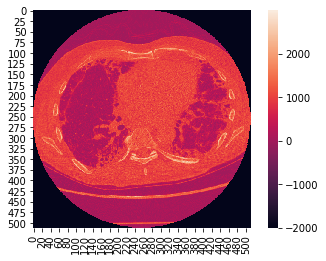

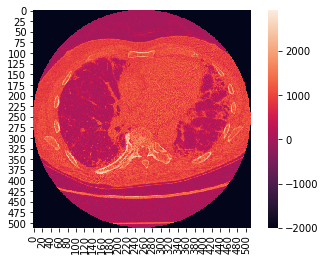

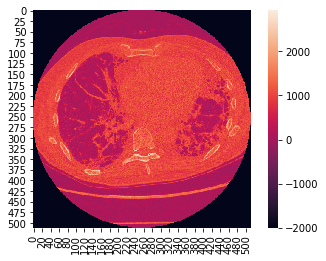

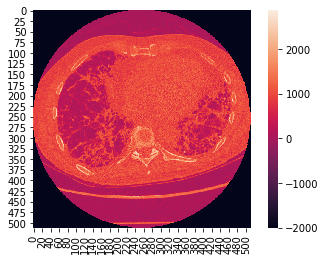

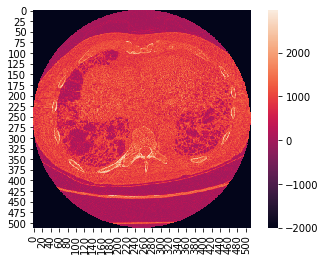

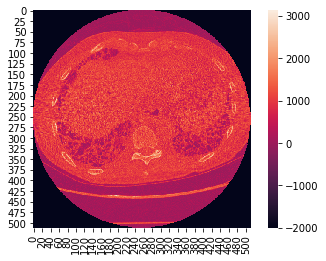

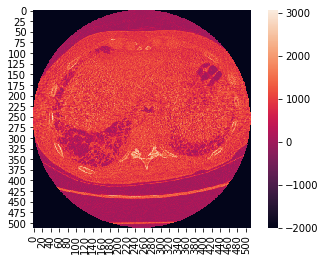

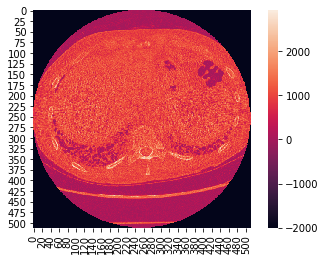

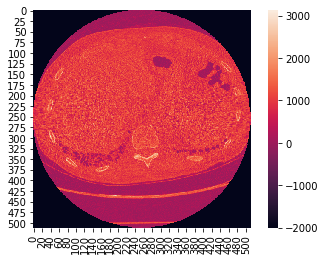

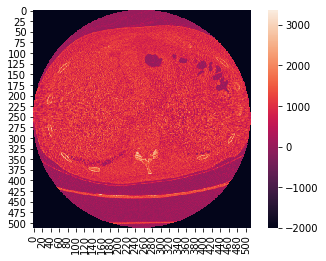

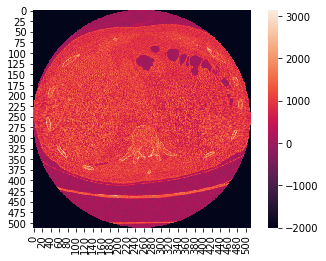

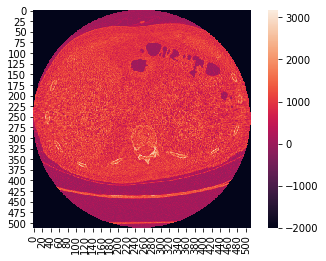

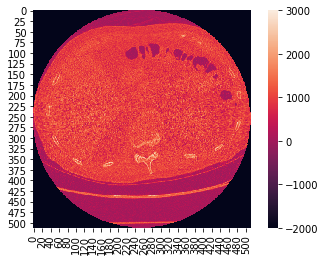

In [4]:
# visualization and save all to a folder
if not os.path.exists(patient_id_str+'_images'):
    os.mkdir(patient_id_str+'_images')
for a_scan in range(num_scans):  
    plt.imshow(arr_scans[a_scan])
    plt.savefig(patient_id_str + '_images/scan_' + str(a_scan+1) + '.png')
    # plot using seaborn
    sns.heatmap(arr_scans[a_scan])
    plt.show()

In [3]:
# function version
# pid: string of patient id number, e.g.: 'ID00007637202177411956430'
# save_image: save image or not, default to false
def load_all_scans(pid: str, save_image=False)->list:
    if os.path.exists(pid + '.DS_Store'):
        os.remove(pid+'.DS_Store') # this MAC OS system file always messes things up
    num_scans = len(os.listdir(pid))
    arr_scans = []
    for a_scan in range(num_scans):
        ds = pydicom.dcmread(pid + '/' + str(a_scan+1) + '.dcm')
        arr_scans.append(ds.pixel_array)

    if (save_image):
        if not os.path.exists(pid+'_images'):
            os.mkdir(pid+'_images')
        for a_scan in range(num_scans):  
            plt.imshow(arr_scans[a_scan])
            plt.savefig(pid + '_images/scan_' + str(a_scan+1) + '.png')
        
    return arr_scans
    

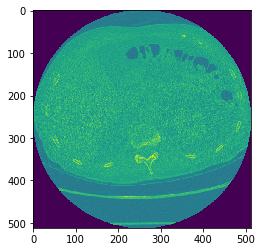

In [7]:
# example usage
# all_scans = load_all_scans('ID00007637202177411956430')
all_scans = load_all_scans('ID00007637202177411956430', True)